<a href="https://colab.research.google.com/github/giovannalinodev/machine_learning/blob/main/Nootebook_Aulas_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#import database from Drive

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#original
link = 'https://drive.google.com/file/d/14z8CAkyC2p2KxMLAyFRen1x-YVpA_6Mo/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('regulation_data.csv')

colums = ['Idade',	'Tipo do caso',	'Escore EUP',	'IOT',	'Leito solicitado',	'Leito de entrada',	'Leito de saída',	'Tempo de internacao',	'Desfecho']


dataset = pd.read_csv('regulation_data.csv', header = None, names = colums)
print(dataset)

       Idade Tipo do caso  Escore EUP  IOT Leito solicitado Leito de entrada  \
0         70   CONFIRMADO           6  NÃO              ENF              Enf   
1         58   CONFIRMADO           2  NÃO              ENF              Int   
2         38   CONFIRMADO           5  SIM              INT              Int   
3         50   CONFIRMADO           2  NÃO              ENF              Enf   
4         72   CONFIRMADO           4  NÃO              ENF              Enf   
...      ...          ...         ...  ...              ...              ...   
18862     57   CONFIRMADO           8  NÃO              ENF              Enf   
18863     43     SUSPEITO           5  NÃO              INT              Int   
18864     46   CONFIRMADO           8  SIM              INT              Int   
18865     47     SUSPEITO           5  NÃO              ENF              Enf   
18866     66   CONFIRMADO           8  SIM              INT              Int   

      Leito de saída  Tempo de internac

#Processamento da base de dados

In [ ]:
dataset[dataset.isnull().any(axis=1)]

,Idade,Tipo do caso,Escore EUP,IOT,Leito solicitado,Leito de entrada,Leito de saída,Tempo de internacao,Desfecho
10357,82,NaN,5,NÃO,ENF,Int,INT,2,ALTA
10521,4,NaN,1,NÃO,ENF,Enf,ENF,6,ALTA


In [ ]:
#Apagar linhas em branco

dataset = dataset.dropna()

dataset

,Idade,Tipo do caso,Escore EUP,IOT,Leito solicitado,Leito de entrada,Leito de saída,Tempo de internacao,Desfecho
0,70,CONFIRMADO,6,NÃO,ENF,Enf,ENF,0,ALTA
1,58,CONFIRMADO,2,NÃO,ENF,Int,INT,1,ÓBITO
2,38,CONFIRMADO,5,SIM,INT,Int,INT,1,ÓBITO
3,50,CONFIRMADO,2,NÃO,ENF,Enf,ENF,2,ALTA
4,72,CONFIRMADO,4,NÃO,ENF,Enf,ENF,1,ALTA
...,...,...,...,...,...,...,...,...,...
18862,57,CONFIRMADO,8,NÃO,ENF,Enf,ENF,1,ALTA
18863,43,SUSPEITO,5,NÃO,INT,Int,INT,4,ÓBITO
18864,46,CONFIRMADO,8,SIM,INT,Int,INT,0,ÓBITO
18865,47,SUSPEITO,5,NÃO,ENF,Enf,ENF,3,ALTA


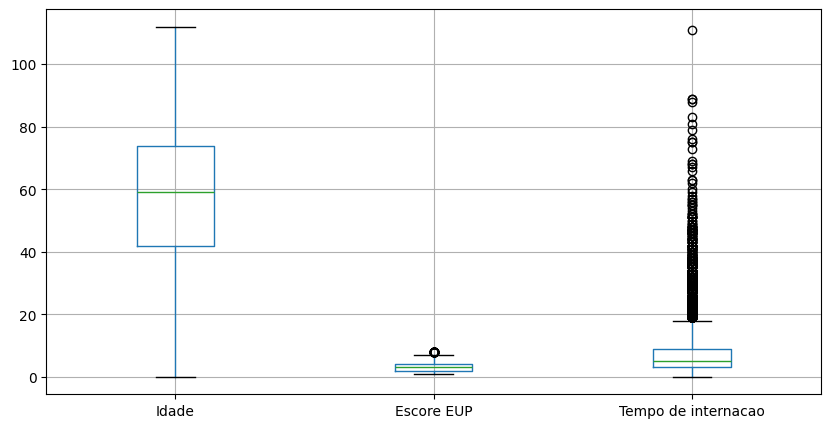

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,5))

dataset.boxplot(column = ['Idade', 'Escore EUP', 'Tempo de internacao'])

plt.show()

In [ ]:
#separando X e Y

x = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

In [ ]:
x

,Idade,Tipo do caso,Escore EUP,IOT,Leito solicitado,Leito de entrada,Leito de saída,Tempo de internacao
0,70,CONFIRMADO,6,NÃO,ENF,Enf,ENF,0
1,58,CONFIRMADO,2,NÃO,ENF,Int,INT,1
2,38,CONFIRMADO,5,SIM,INT,Int,INT,1
3,50,CONFIRMADO,2,NÃO,ENF,Enf,ENF,2
4,72,CONFIRMADO,4,NÃO,ENF,Enf,ENF,1
...,...,...,...,...,...,...,...,...
18862,57,CONFIRMADO,8,NÃO,ENF,Enf,ENF,1
18863,43,SUSPEITO,5,NÃO,INT,Int,INT,4
18864,46,CONFIRMADO,8,SIM,INT,Int,INT,0
18865,47,SUSPEITO,5,NÃO,ENF,Enf,ENF,3


In [ ]:
y

,Desfecho
0,ALTA
1,ÓBITO
2,ÓBITO
3,ALTA
4,ALTA
...,...
18862,ALTA
18863,ÓBITO
18864,ÓBITO
18865,ALTA


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['IOT', 'Leito solicitado', 'Leito de entrada', 'Leito de saída']

le = LabelEncoder()

x[cols] = x[cols].apply(le.fit_transform)

x.head(10)

,Idade,Tipo do caso,Escore EUP,IOT,Leito solicitado,Leito de entrada,Leito de saída,Tempo de internacao
0,70,CONFIRMADO,6,0,0,0,0,0
1,58,CONFIRMADO,2,0,0,1,1,1
2,38,CONFIRMADO,5,1,1,1,1,1
3,50,CONFIRMADO,2,0,0,0,0,2
4,72,CONFIRMADO,4,0,0,0,0,1
5,92,CONFIRMADO,4,0,0,0,0,3
6,89,CONFIRMADO,3,0,0,0,0,4
7,81,CONFIRMADO,5,0,0,0,0,5
8,24,CONFIRMADO,3,0,1,1,1,6
9,67,CONFIRMADO,4,0,1,1,1,6


In [ ]:
import numpy as np
y = np.where(y=='ÓBITO', 1,0)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), ['Tipo do caso'])], remainder='passthrough')

x = ct.fit_transform(x)

In [ ]:
x

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 0., 3.],
       [1., 0., 0., ..., 1., 1., 1.]])

In [ ]:
colums = ['Tipo do caso conf','tipo do caso desc','Tipo do caso susp','Idade',	'Escore EUP',	'IOT',	'Leito solicitado',	'Leito de entrada',	'Leito de saída',	'Tempo de internacao']

pd.DataFrame(x, columns = colums)


,Tipo do caso conf,tipo do caso desc,Tipo do caso susp,Idade,Escore EUP,IOT,Leito solicitado,Leito de entrada,Leito de saída,Tempo de internacao
0,1.0,0.0,0.0,70.0,6.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,58.0,2.0,0.0,0.0,1.0,1.0,1.0
2,1.0,0.0,0.0,38.0,5.0,1.0,1.0,1.0,1.0,1.0
3,1.0,0.0,0.0,50.0,2.0,0.0,0.0,0.0,0.0,2.0
4,1.0,0.0,0.0,72.0,4.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
18860,1.0,0.0,0.0,57.0,8.0,0.0,0.0,0.0,0.0,1.0
18861,0.0,0.0,1.0,43.0,5.0,0.0,1.0,1.0,1.0,4.0
18862,1.0,0.0,0.0,46.0,8.0,1.0,1.0,1.0,1.0,0.0
18863,0.0,0.0,1.0,47.0,5.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
#Dividir dados em treinamento e teste

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
#Normalização

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[ 0.65424056, -0.1598481 , -0.61560397, ...,  1.03491433,
         1.12300051, -0.26306647],
       [ 0.65424056, -0.1598481 , -0.61560397, ...,  1.03491433,
         1.12300051,  1.0196173 ],
       [ 0.65424056, -0.1598481 , -0.61560397, ...,  1.03491433,
        -0.89047155,  0.87709688],
       ...,
       [ 0.65424056, -0.1598481 , -0.61560397, ..., -0.96626355,
        -0.89047155,  0.59205604],
       [ 0.65424056, -0.1598481 , -0.61560397, ...,  1.03491433,
         1.12300051,  1.87473981],
       [ 0.65424056, -0.1598481 , -0.61560397, ...,  1.03491433,
         1.12300051,  0.87709688]])

#Utilizando Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=40)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=40)

In [ ]:
from sklearn.metrics import classification_report

y_pred = dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4122
           1       0.61      0.61      0.61      1538

    accuracy                           0.79      5660
   macro avg       0.73      0.73      0.73      5660
weighted avg       0.79      0.79      0.79      5660



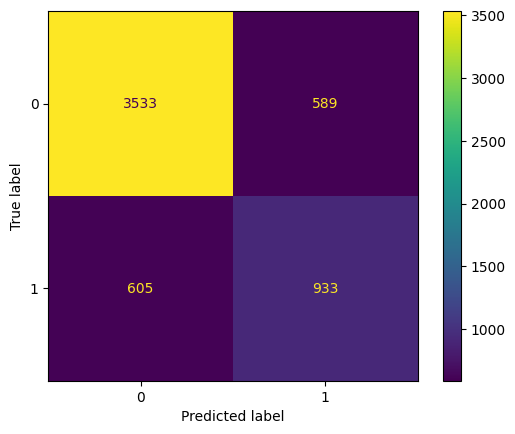

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

#y_pred = dt.predict(x_test)
predictions = dt.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()


#Usando o Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4122
           1       0.69      0.65      0.67      1538

    accuracy                           0.83      5660
   macro avg       0.78      0.77      0.78      5660
weighted avg       0.82      0.83      0.83      5660



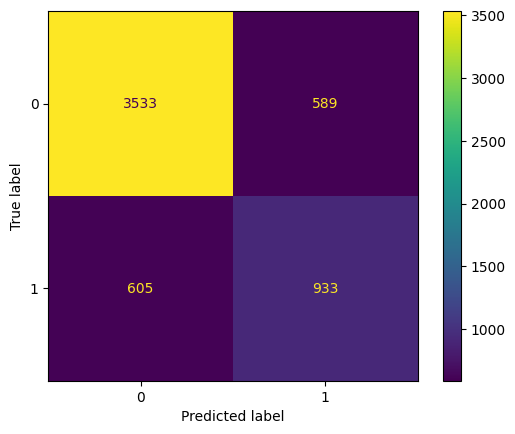

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

#y_pred = dt.predict(x_test)
predictions = dt.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()


In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5


ValueError: Dimensions must be equal, but are 32 and 320 for '{{node LogicalAnd}} = LogicalAnd[](Tile_2, Greater)' with input shapes: [1,32], [1,320].